## Analysis

In this code we will focus on the analysis of the dataframe obtained from the previous code

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("/home/astrotomi/Downloads/10M.csv")
df.head()

,Masses,log(age),log(T_MS),remanent_mass,remanent_ID,actual
0,0.597948,7.009041,10.558341,0.459176,2,MS
1,0.265567,9.443573,11.439566,0.422947,2,MS
2,0.248046,2.123821,11.513670,0.421037,2,MS
3,0.264375,8.793208,11.444447,0.422817,2,MS
4,0.772394,7.003477,10.280403,0.478191,2,MS


In [17]:
def actual_mass(MI,MF,ac):
    Masas_Actuales = []
    for i,f,a in zip(MI,MF,ac):
        if a=="MS":
            m = i
            Masas_Actuales.append(m)
        else:
            m = f
            Masas_Actuales.append(m)
    return Masas_Actuales
masasf = actual_mass(df["Masses"],df["remanent_mass"],df["actual"])
df["Actual_Mass"] = masasf

In [84]:
df_ms = df[df["actual"]=="MS"]
df_BH = df[df["actual"]=="Black_Hole"]
df_WD = df[df["actual"]=="WD"]
df_NS = df[df["actual"]=="Neutron_Star"]

### 2) Normalised histogram
Make a normalised histogram which displays the final masses at age of the Milky for
the main sequence stars, white dwarf, neutron stars and black holes (with different
colours)

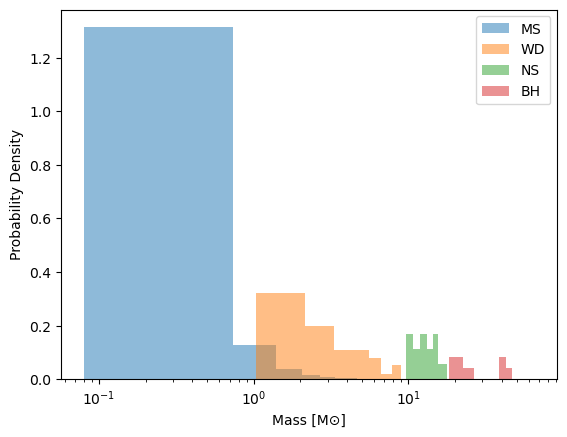

In [82]:
plt.hist(df_ms["Masses"], bins=100, density=True,label="MS",alpha=0.5)
plt.hist(df_WD["Masses"], bins=7, density=True,label="WD",alpha=0.5)
plt.hist(df_NS["Masses"], bins=7, density=True,label="NS",alpha=0.5)
plt.hist(df_BH["Masses"], bins=7, density=True,label="BH",alpha=0.5)

plt.xlabel('Mass [M⊙]') 
plt.ylabel("Probability Density")  

plt.xscale("log")
plt.legend()
plt.show()


### 3) Ages Histogram
Make a histogram of the age of the stellar bodies (with different colours). Discuss the
distribution you are getting, and why does it have that shape

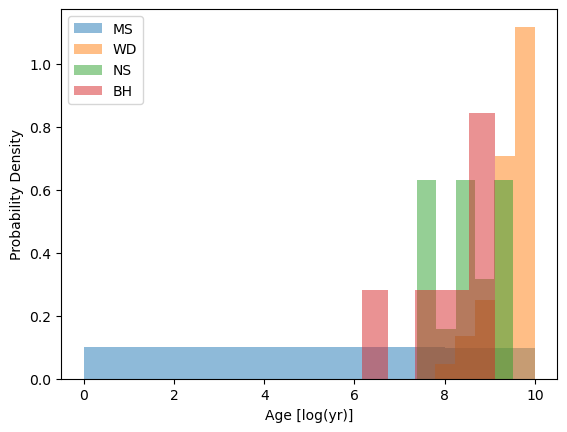

In [92]:
plt.hist(df_ms["log(age)"], bins=5, density=True,label="MS",alpha=0.5)
plt.hist(df_WD["log(age)"], bins=5, density=True,label="WD",alpha=0.5)
plt.hist(df_NS["log(age)"], bins=5, density=True,label="NS",alpha=0.5)
plt.hist(df_BH["log(age)"], bins=5, density=True,label="BH",alpha=0.5)

plt.xlabel('Age [log(yr)]') 
plt.ylabel("Probability Density")  

plt.legend()
3plt.show()

### 4) Fraction of the population
Provide the fraction for which each of these 4 stellar bodies, are they consistent with
the census of the Milky way

In [96]:
df["actual"].value_counts()

MS              14765
WD                 99
Neutron_Star       15
Black_Hole          6
Name: actual, dtype: int64

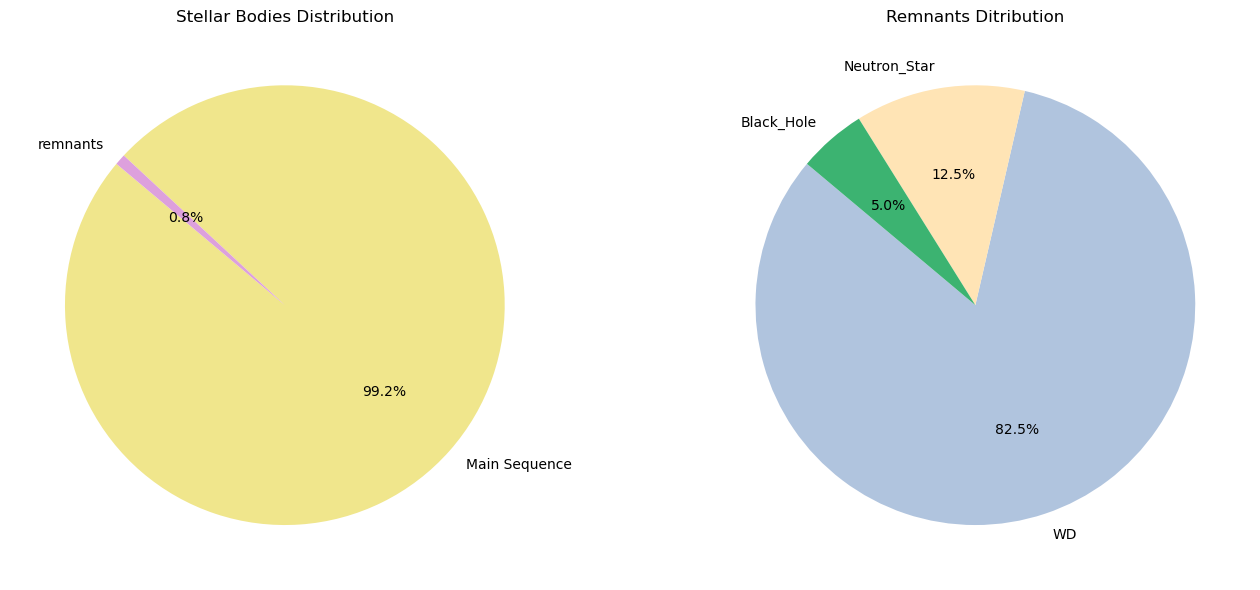

In [109]:
categorias = ['Main Sequence', "remnants"]
cantidades = [14765, 120]

categorias_ultimas = ['WD', 'Neutron_Star', 'Black_Hole']
cantidades_ultimas = [99, 15, 6]

plt.figure(figsize=(14, 6))

# Primer gráfico circular en la posición 1
plt.subplot(1, 2, 1)
plt.pie(cantidades, labels=categorias, autopct='%1.1f%%', startangle=140,colors=["khaki","plum"])
plt.title('Stellar Bodies Distribution')

# Segundo gráfico circular en la posición 2
plt.subplot(1, 2, 2)
plt.pie(cantidades_ultimas, labels=categorias_ultimas, autopct='%1.1f%%', startangle=140,colors=["lightsteelblue","moccasin","mediumseagreen"])
plt.title("Remnants Ditribution")

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()